In [65]:
import tensorflow as tf

In [66]:
print(tf.__version__)

2.6.0


In [67]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [68]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [69]:
from keras.preprocessing.image import ImageDataGenerator

In [70]:
import os
image_path = os.path.abspath('Test Notebook.ipynb')
print(image_path)

C:\Users\KARTIK BALI\Test Notebook.ipynb


In [71]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

C:\Users\KARTIK~1\AppData\Local\Temp/ipykernel_10484/1902160469.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


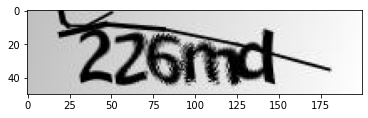

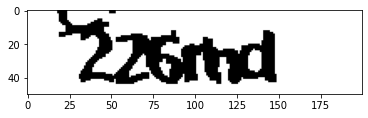

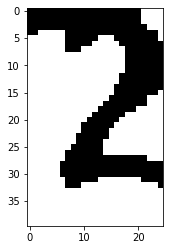

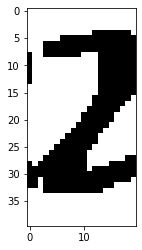

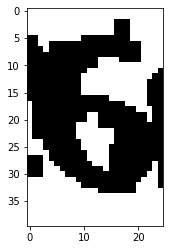

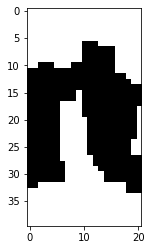

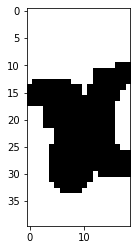

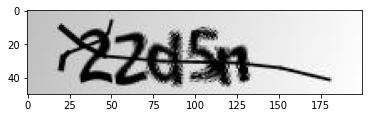

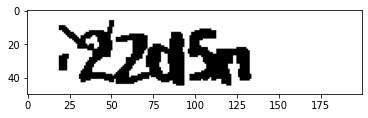

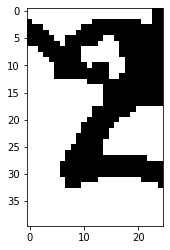

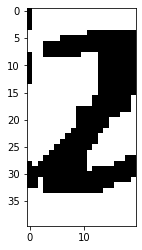

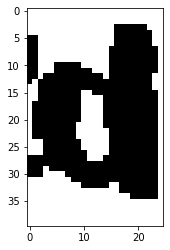

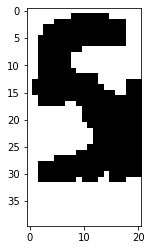

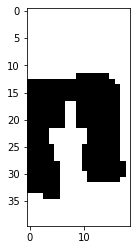

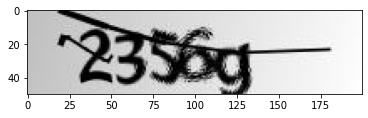

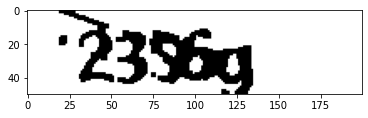

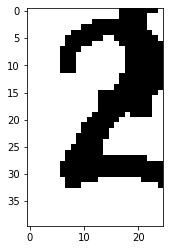

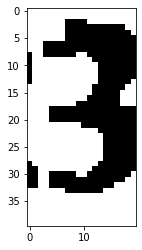

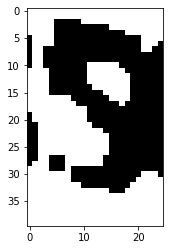

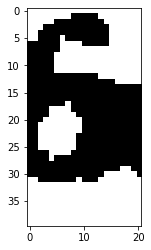

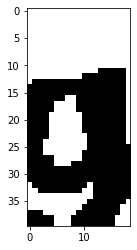

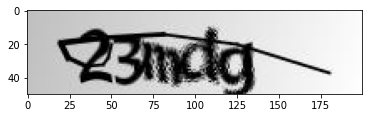

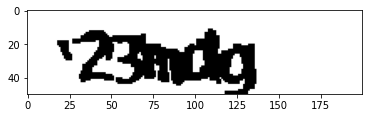

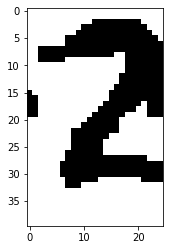

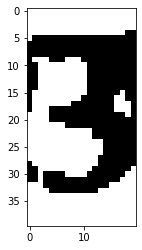

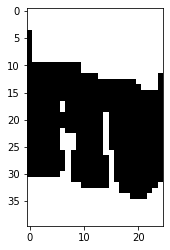

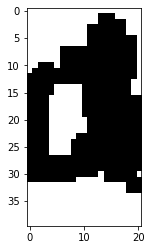

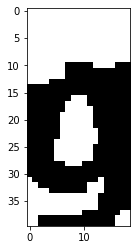

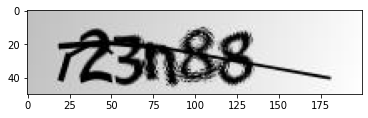

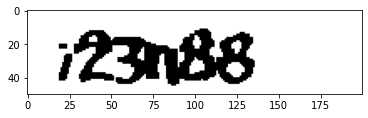

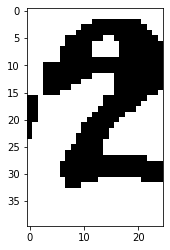

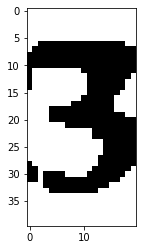

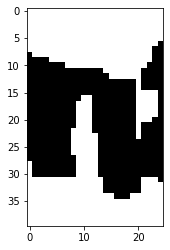

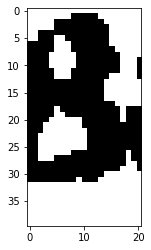

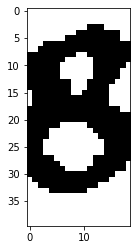

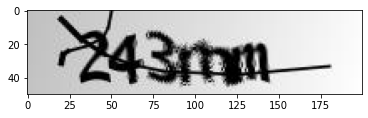

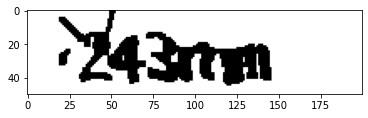

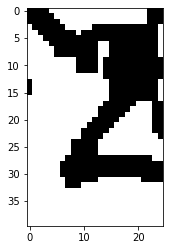

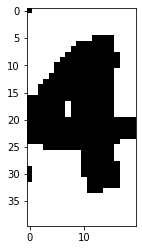

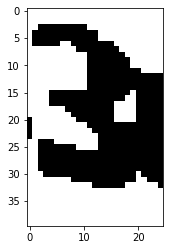

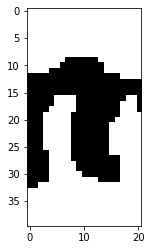

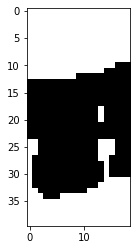

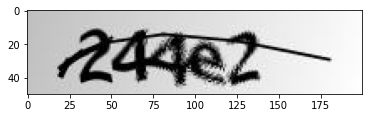

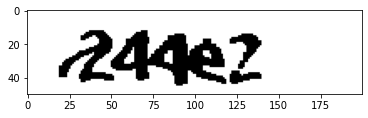

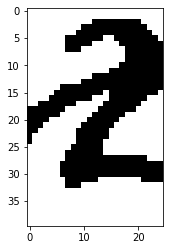

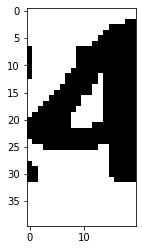

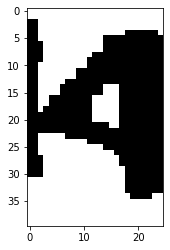

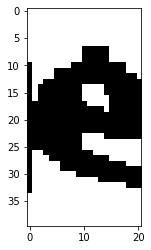

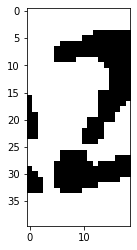

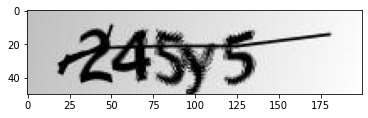

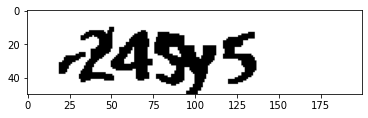

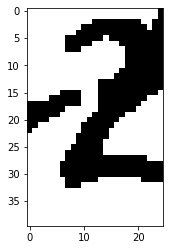

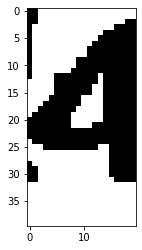

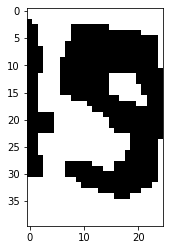

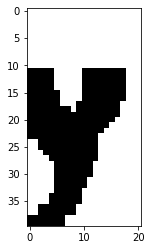

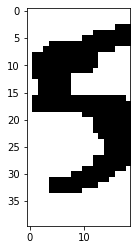

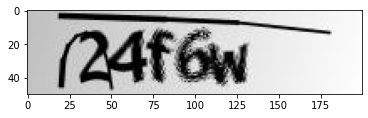

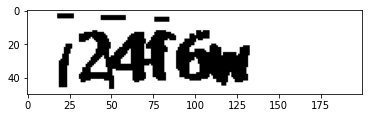

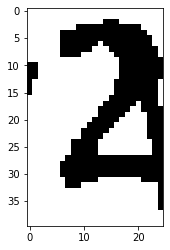

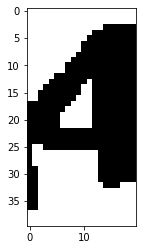

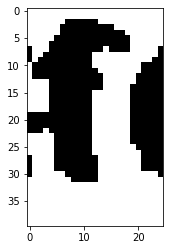

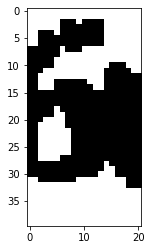

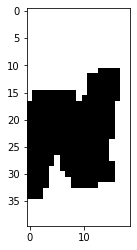

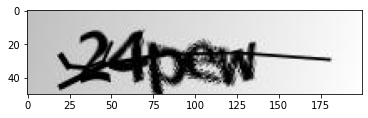

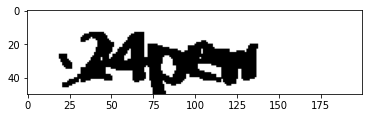

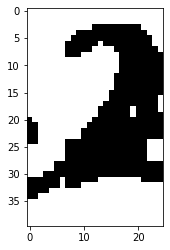

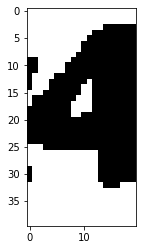

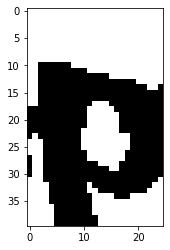

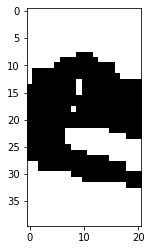

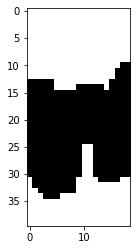

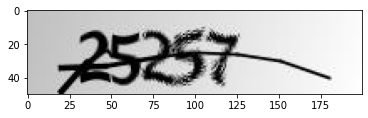

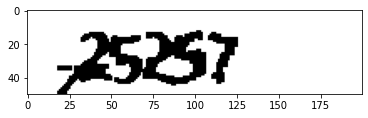

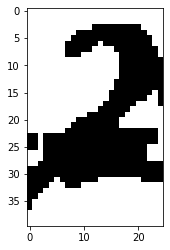

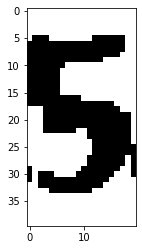

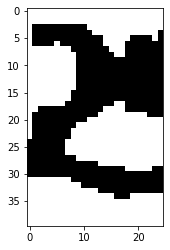

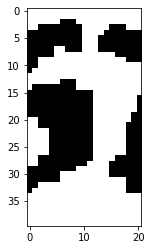

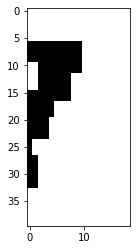

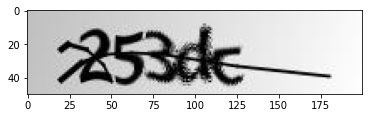

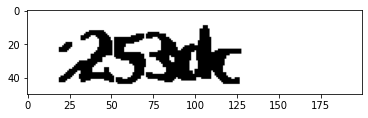

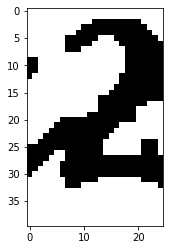

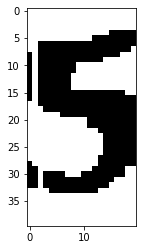

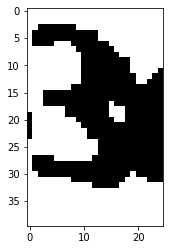

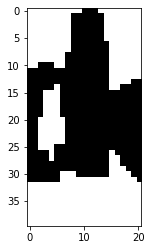

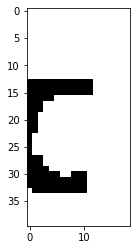

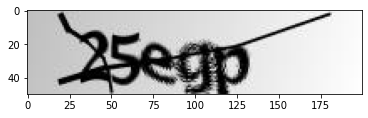

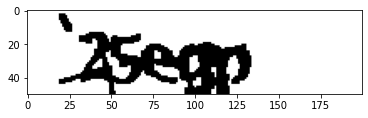

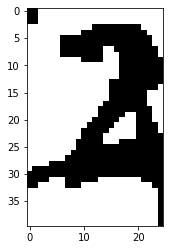

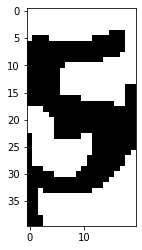

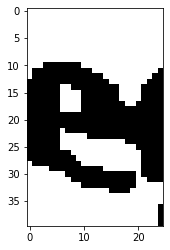

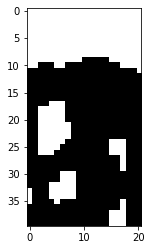

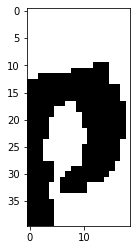

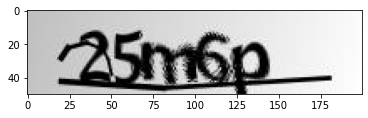

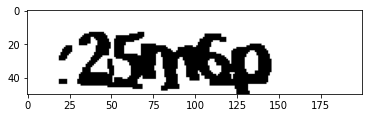

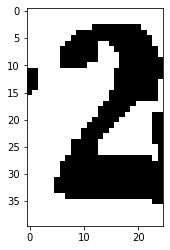

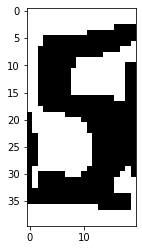

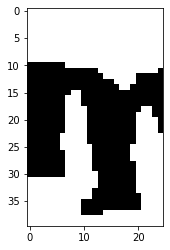

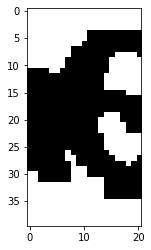

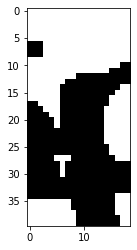

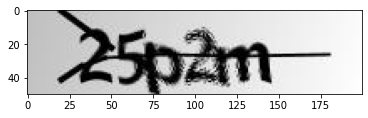

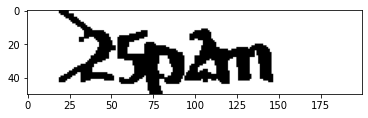

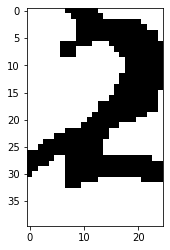

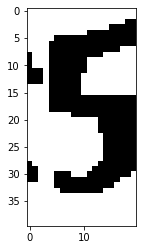

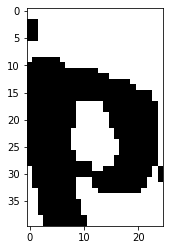

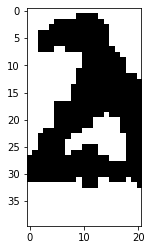

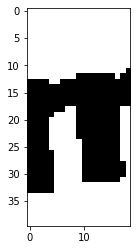

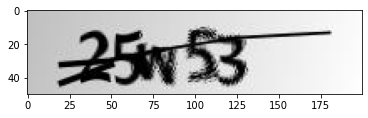

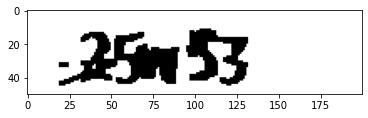

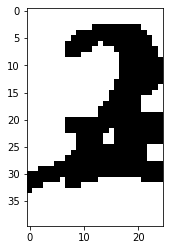

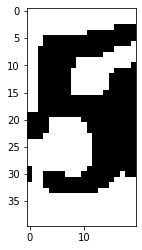

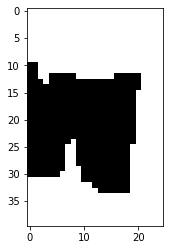

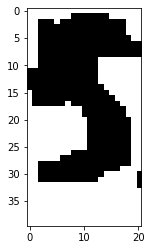

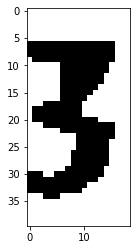

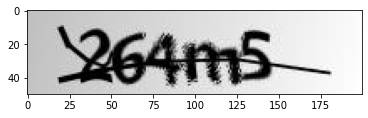

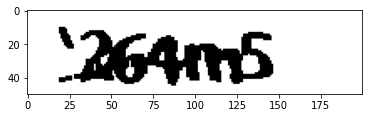

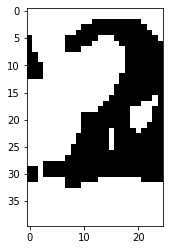

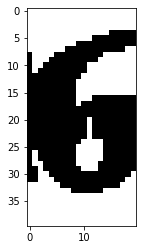

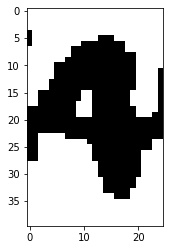

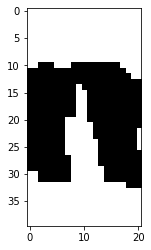

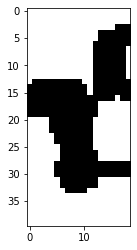

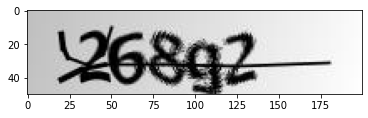

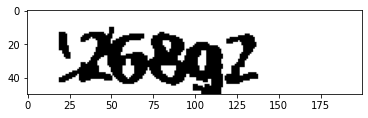

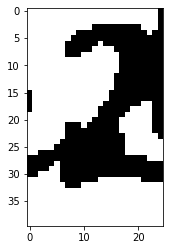

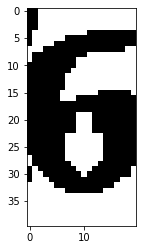

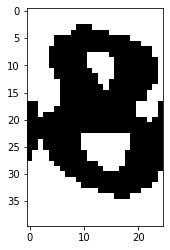

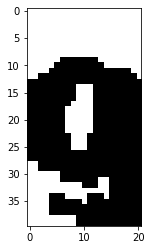

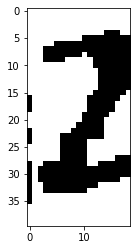

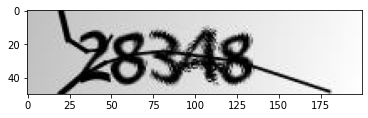

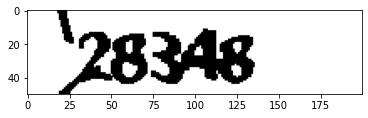

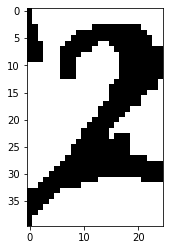

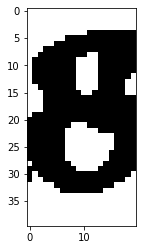

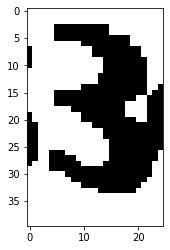

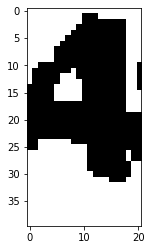

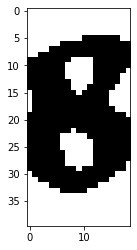

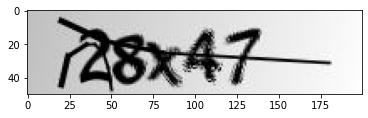

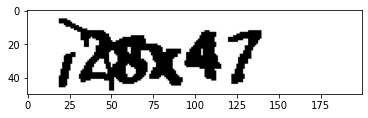

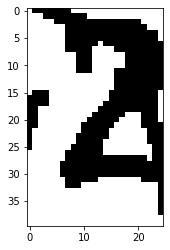

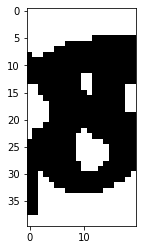

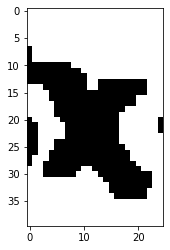

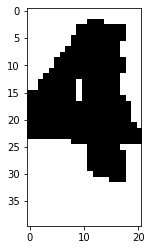

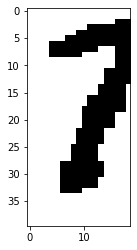

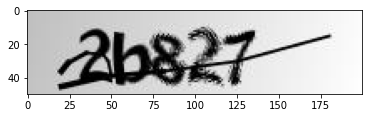

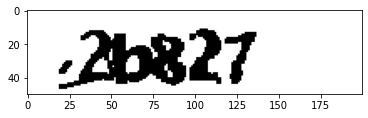

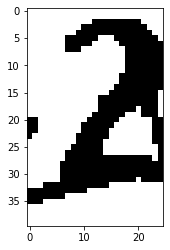

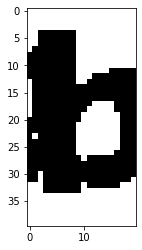

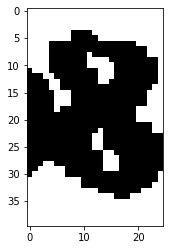

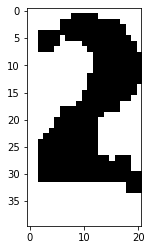

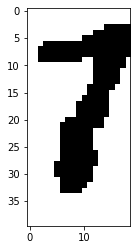

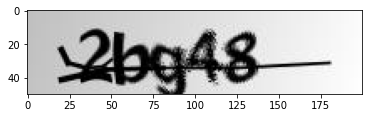

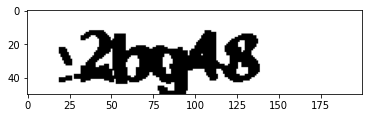

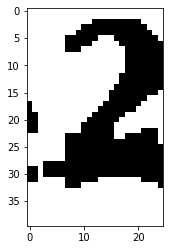

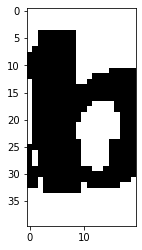

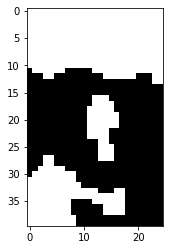

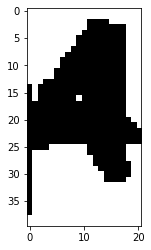

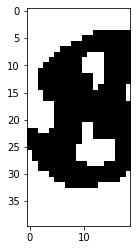

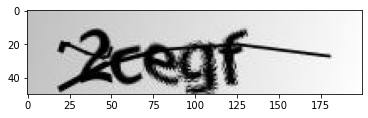

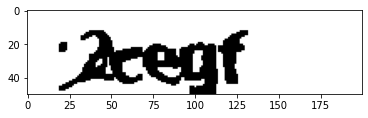

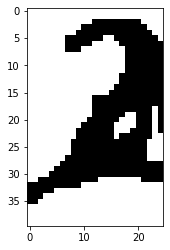

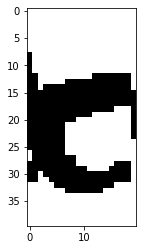

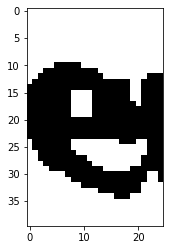

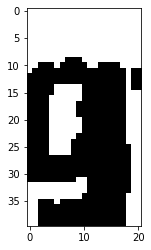

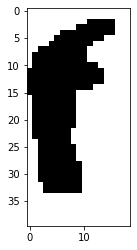

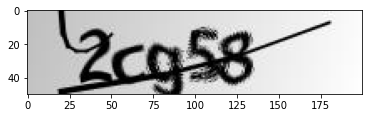

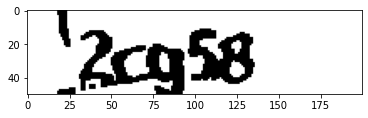

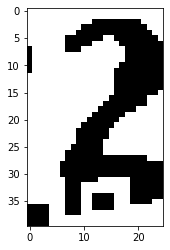

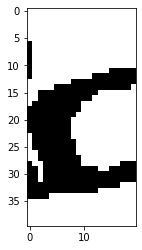

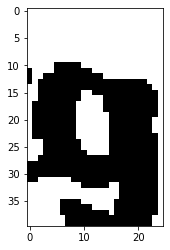

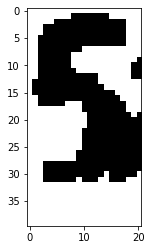

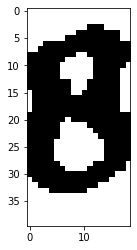

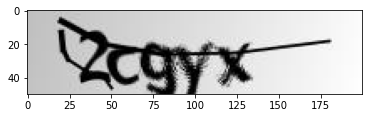

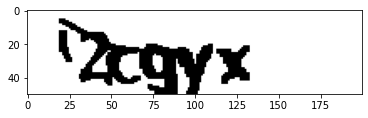

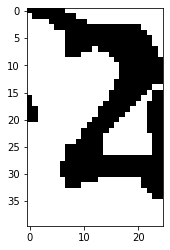

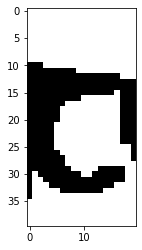

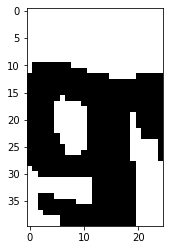

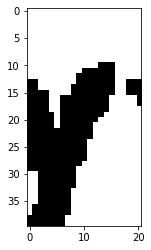

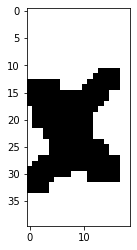

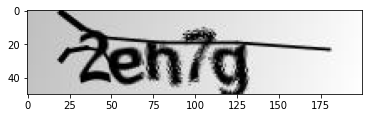

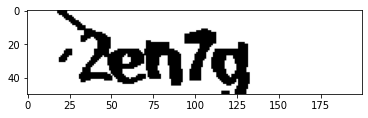

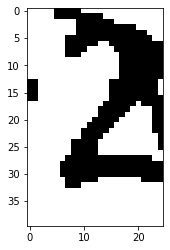

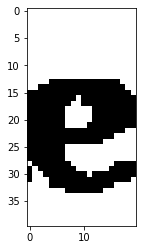

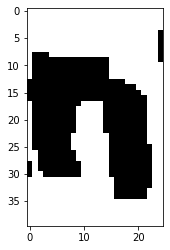

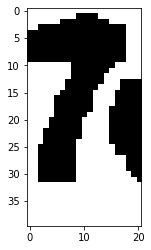

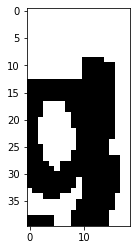

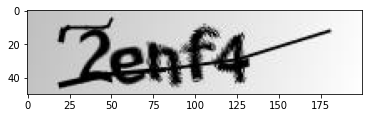

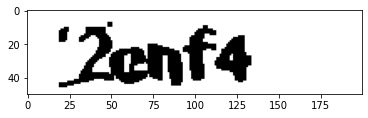

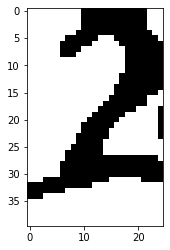

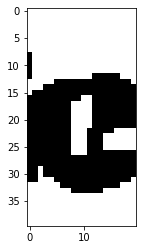

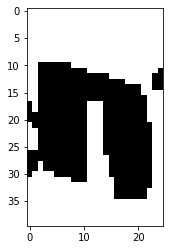

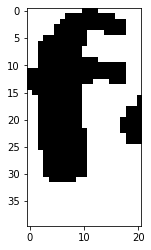

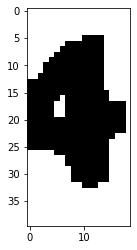

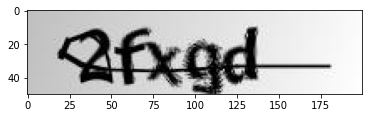

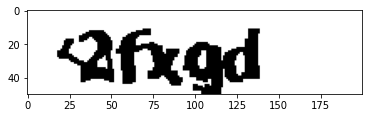

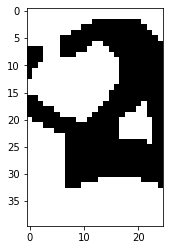

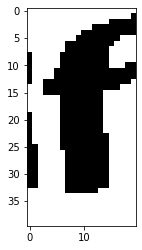

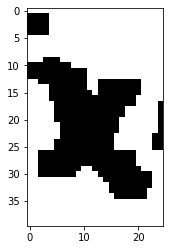

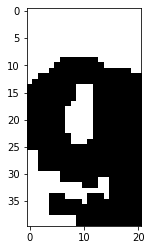

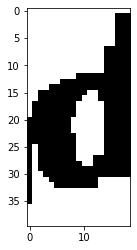

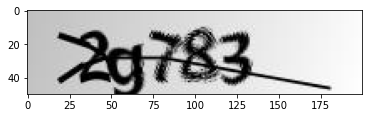

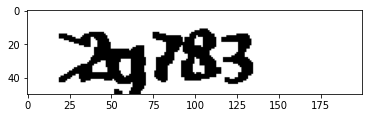

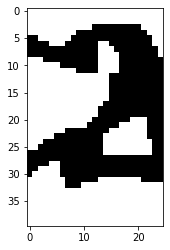

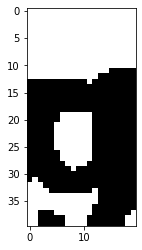

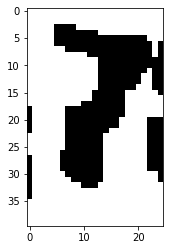

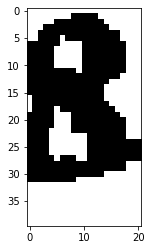

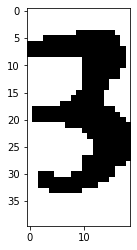

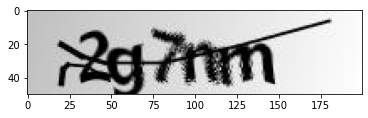

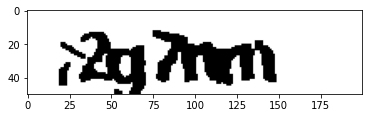

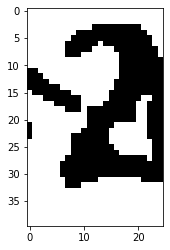

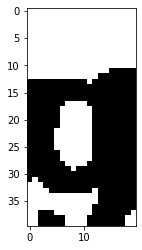

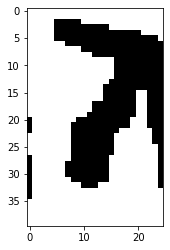

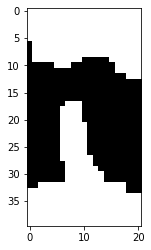

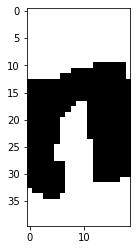

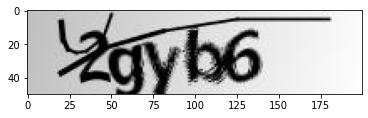

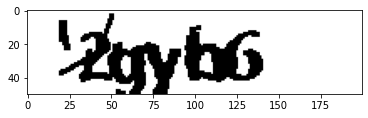

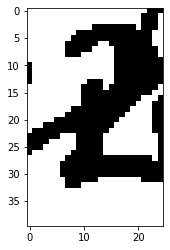

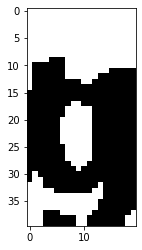

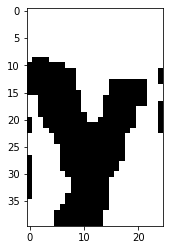

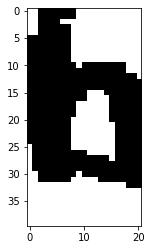

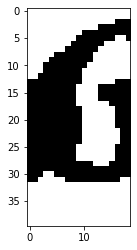

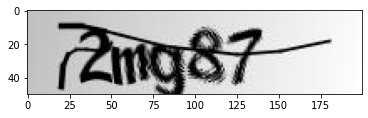

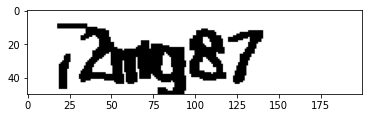

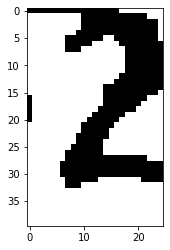

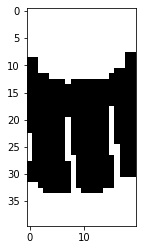

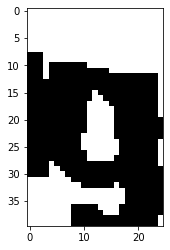

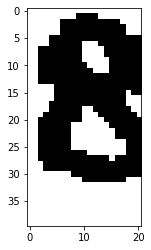

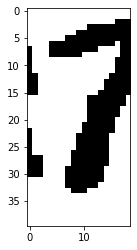

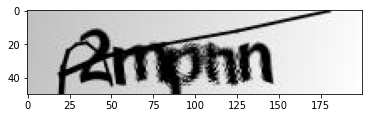

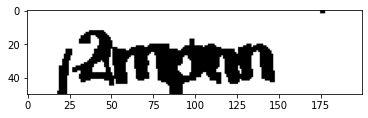

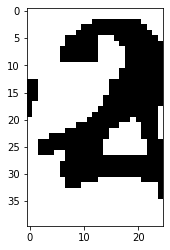

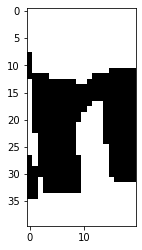

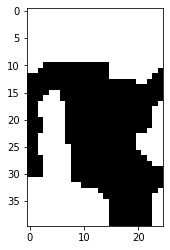

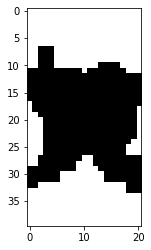

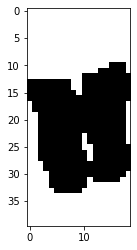

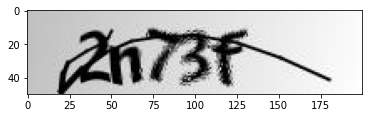

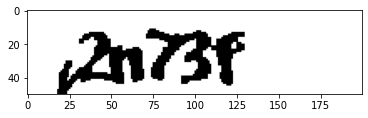

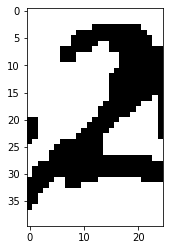

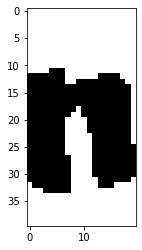

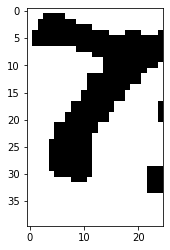

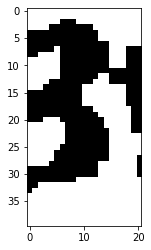

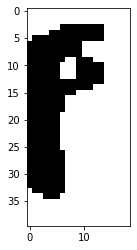

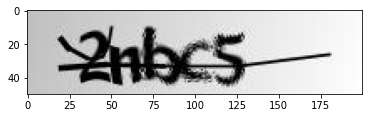

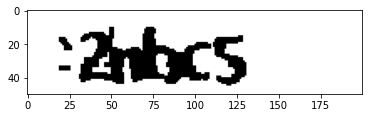

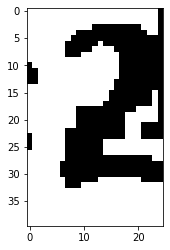

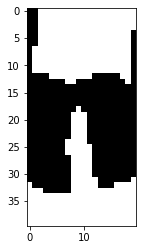

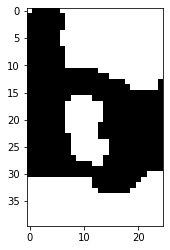

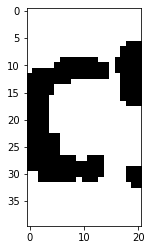

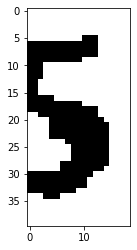

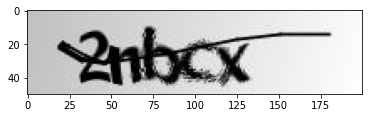

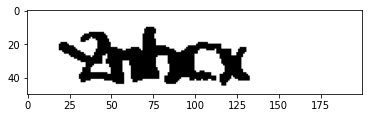

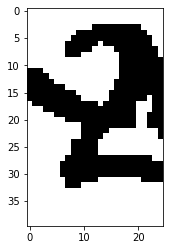

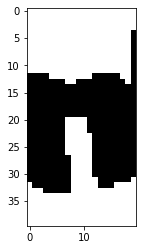

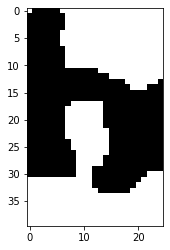

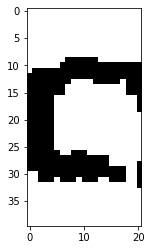

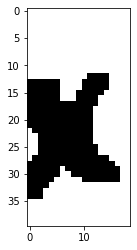

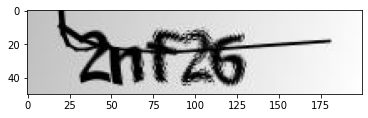

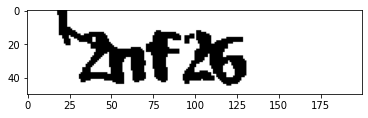

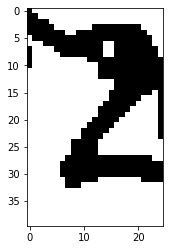

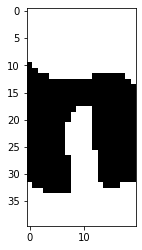

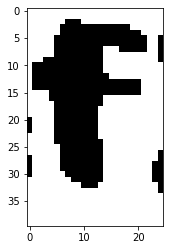

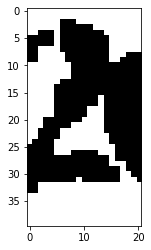

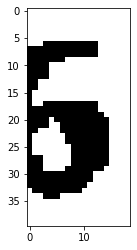

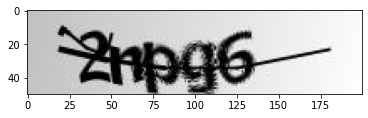

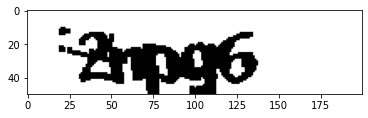

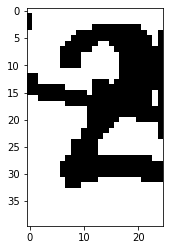

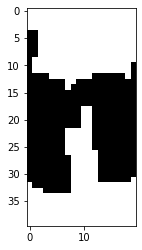

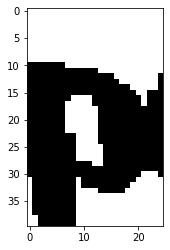

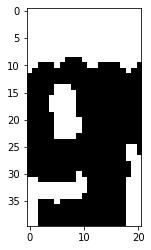

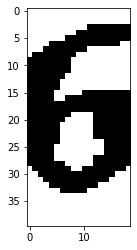

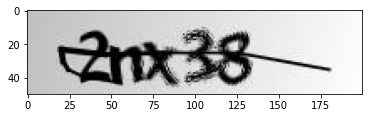

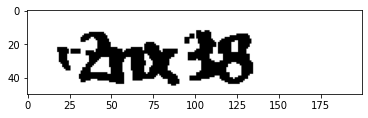

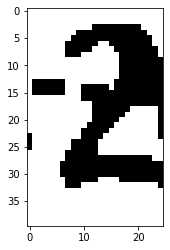

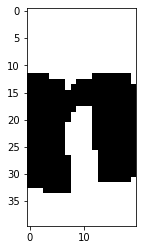

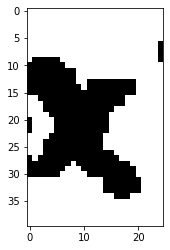

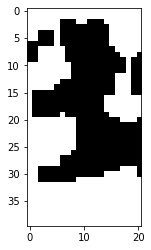

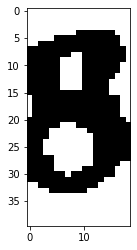

In [72]:
iter = 0
captcha_dir = "C:/Users/KARTIK BALI/Desktop/Datasets CNN/CAPTCHA/samples"
for i in os.listdir(captcha_dir):
    iter+=1
    img_path = captcha_dir+'/'+i 
    img = cv2.imread(img_path)
    b,g,r = cv2.split(img)
    img1 = cv2.merge((r,g,b))
    kernel_dil = np.ones((5,2),'uint8')
    kernel_ero = np.ones((3,3),'uint8')
    thresh = 190#creasing threshold will increase the black since we're making the white criteria stricter 
    img2 = cv2.dilate(img,kernel_dil)
    img2 = cv2.erode(img2,kernel_ero)
    #img2 = cv2.dilate(img2,kernel_ero)
    kernel2 = np.ones((2,2),'uint8')
    img2 = cv2.threshold(img2,thresh,255,cv2.THRESH_BINARY)[1]
    #img2 = cv2.erode(img2,kernel2)
    #img2[Height,width]
    I1_image = i[:-4]+"(1)"+".png"
    I2_image = i[:-4]+"(2)"+".png"
    I3_image = i[:-4]+"(3)"+".png"
    I4_image = i[:-4]+"(4)"+".png"
    I5_image = i[:-4]+"(5)"+".png"
    
    I1 = img2[10:50,25:50]
    I2 = img2[10:50,50:70]
    I3 = img2[10:50,70:95]
    I4 = img2[10:50,95:116]
    I5 = img2[10:50,116:135]
    
    path = "C:/Users/KARTIK BALI/Desktop/Datasets CNN/CAPTCHA/Train_Image_Set"
    cv2.imwrite(os.path.join(path,I1_image),I1)
    cv2.imwrite(os.path.join(path,I2_image),I2)
    cv2.imwrite(os.path.join(path,I3_image),I3)
    cv2.imwrite(os.path.join(path,I4_image),I4)
    cv2.imwrite(os.path.join(path,I5_image),I5)

    #img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    #img2 = cv2.merge((b1,b1,b1))    
    if(iter<40 and iter>0):
        plt.figure()
        plt.imshow(img1)
        plt.figure()
        plt.imshow(img2)
        plt.figure()
        plt.imshow(I1)
        plt.figure()
        plt.imshow(I2)
        plt.figure()
        plt.imshow(I3)
        plt.figure()
        plt.imshow(I4)
        plt.figure()
        plt.imshow(I5)


In [73]:
path = "C:/Users/KARTIK BALI/Desktop/Datasets CNN/CAPTCHA/Train_Image_Set"
Y = list()
for string in os.listdir(path):
    Y.append(string[int(string[6:7])-1:int(string[6:7])])

import pandas as pd
import numpy as np

Y = {'image_id':os.listdir(path),'label':Y}
Y = pd.DataFrame(Y)
Y.head()
y = np.zeros((5350,19),'uint8')
y_val_categories = ['2','3','4','5','6','7','8','b','c','d','e','f','g','m','n','p','w','x','y']
print(y_val_categories)
for i in range(len(Y.label)):
    for j in range(len(y_val_categories)):
        if(Y.loc[i,'label']==y_val_categories[j]):
            y[i,j] = 1;          
#y = {'2':y[:,0],'3':y[:,1],'4':y[:,2],'5':y[:,3],'6':y[:,4],'7':y[:,5],'8':y[:,6],'b':y[:,7],'c':y[:,8],'d':y[:,9],'e':y[:,10],
#     'f':y[:,11],'g':y[:,12],'m':y[:,13],'n':y[:,14],'p':y[:,15],'w':y[:,16],'x':y[:,17],'y':y[:,18]}
y = pd.DataFrame(y,columns = y_val_categories)
Y = pd.concat((Y.image_id,y),axis=1)
print(Y.head())

['2', '3', '4', '5', '6', '7', '8', 'b', 'c', 'd', 'e', 'f', 'g', 'm', 'n', 'p', 'w', 'x', 'y']
       image_id  2  3  4  5  6  7  8  b  c  d  e  f  g  m  n  p  w  x  y
0  226md(1).png  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
1  226md(2).png  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
2  226md(3).png  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
3  226md(4).png  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
4  226md(5).png  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0


In [74]:
from  keras_preprocessing.image import ImageDataGenerator
pre = ImageDataGenerator(
    validation_split= 0.2)
train_gen = pre.flow_from_dataframe(
    dataframe = Y,
    directory = path,
    shuffle = True,
    class_mode = 'raw',
    color_mode = 'grayscale',
    x_col = 'image_id',
    y_col = Y.columns.tolist()[1:],
    subset = 'training',
    batch_size = 32,
    seed = 42,
    target_size = (25,40)
    )
valid_gen = pre.flow_from_dataframe(
    dataframe = Y,
    directory = path,
    shuffle = True,
    class_mode = 'raw',
    color_mode = 'grayscale',
    x_col = 'image_id',
    y_col = Y.columns.tolist()[1:],
    subset = 'validation',
    batch_size = 32,
    seed = 42,
    target_size = (25,40)
    )

Found 4280 validated image filenames.
Found 1070 validated image filenames.


In [75]:
import keras
from keras import layers,datasets,models

model = keras.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='SAME',input_shape=(25,40,1)),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='SAME'),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='SAME'),
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='SAME'),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(19,activation='softmax')
])

In [76]:
#from keras.optimizers import Adam

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])
history = model.fit(train_gen,epochs=20,validation_data = valid_gen)

Epoch 1/20
134/134 [==============================] - 4s 26ms/step - loss: 2.5430 - accuracy: 0.5336 - val_loss: 0.5419 - val_accuracy: 0.8430
Epoch 2/20
134/134 [==============================] - 3s 25ms/step - loss: 0.4397 - accuracy: 0.8717 - val_loss: 0.3778 - val_accuracy: 0.8748
Epoch 3/20
134/134 [==============================] - 3s 26ms/step - loss: 0.2531 - accuracy: 0.9243 - val_loss: 0.3159 - val_accuracy: 0.9009
Epoch 4/20
134/134 [==============================] - 3s 24ms/step - loss: 0.1726 - accuracy: 0.9388 - val_loss: 0.5081 - val_accuracy: 0.8533
Epoch 5/20
134/134 [==============================] - 3s 24ms/step - loss: 0.1313 - accuracy: 0.9556 - val_loss: 0.2979 - val_accuracy: 0.9084
Epoch 6/20
134/134 [==============================] - 3s 26ms/step - loss: 0.0941 - accuracy: 0.9638 - val_loss: 0.2963 - val_accuracy: 0.9112
Epoch 7/20
134/134 [==============================] - 3s 25ms/step - loss: 0.0981 - accuracy: 0.9659 - val_loss: 0.3271 - val_accuracy: 0.9131

<AxesSubplot:>

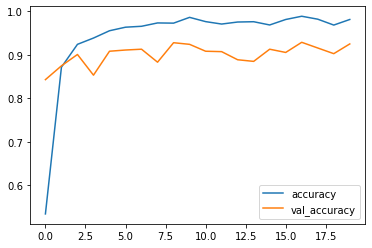

In [77]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['accuracy','val_accuracy']].plot()

C:\Users\KARTIK~1\AppData\Local\Temp/ipykernel_10484/1429332252.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


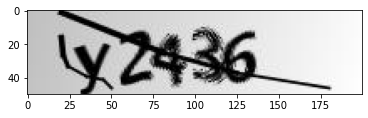

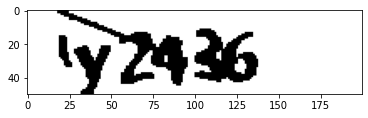

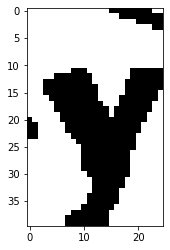

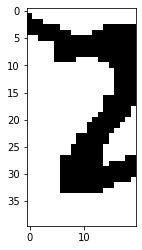

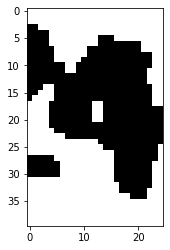

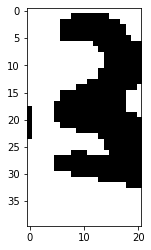

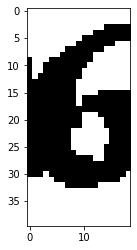

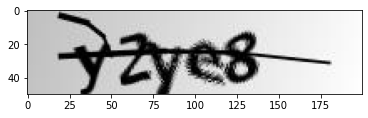

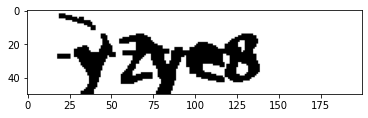

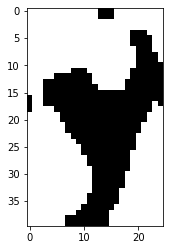

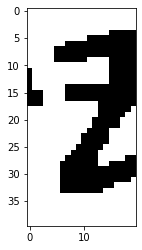

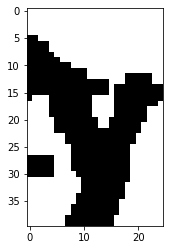

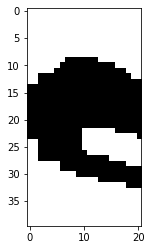

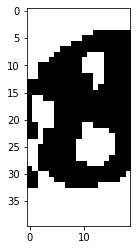

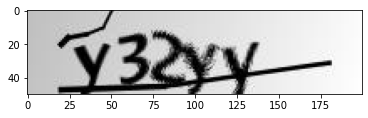

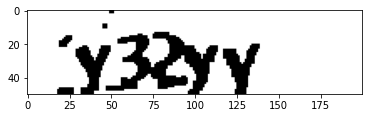

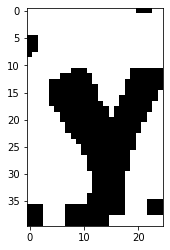

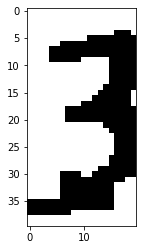

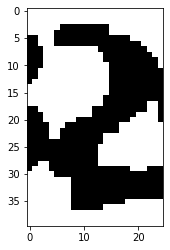

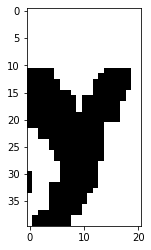

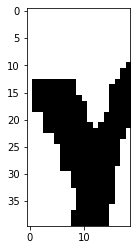

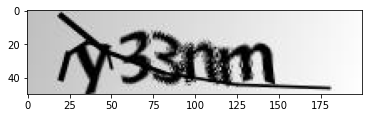

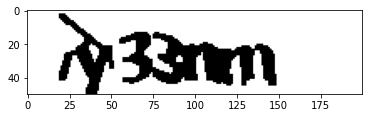

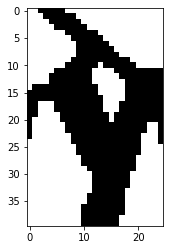

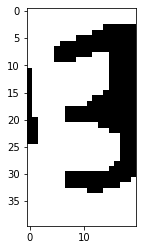

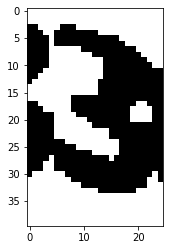

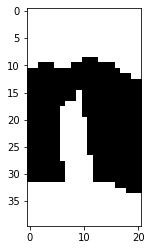

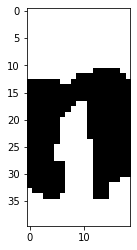

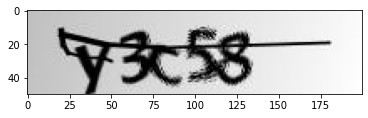

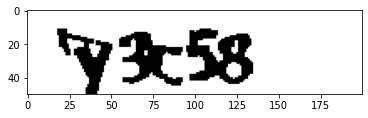

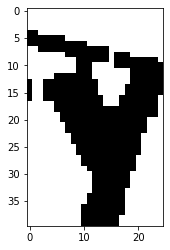

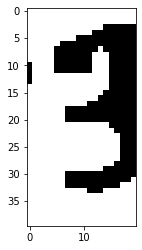

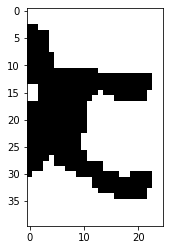

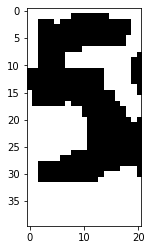

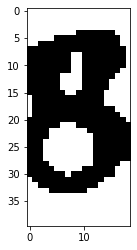

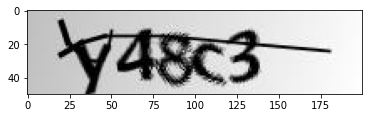

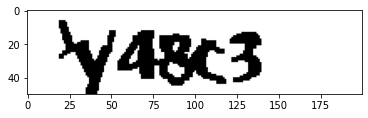

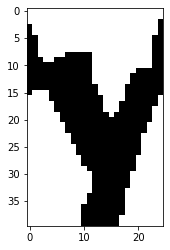

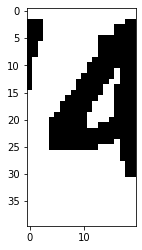

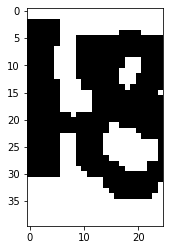

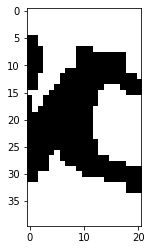

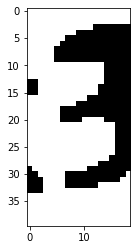

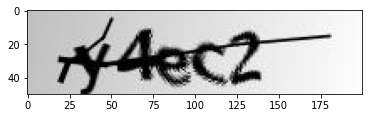

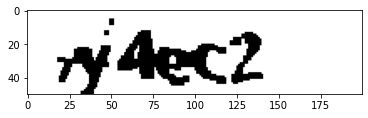

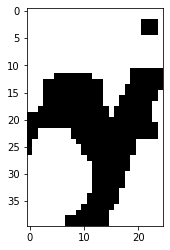

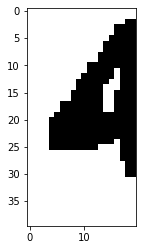

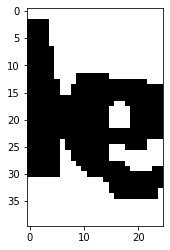

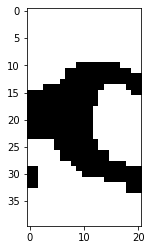

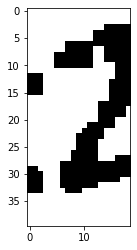

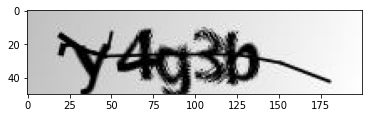

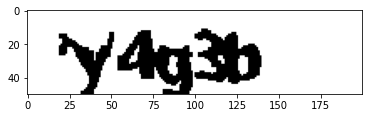

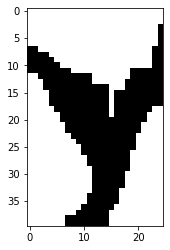

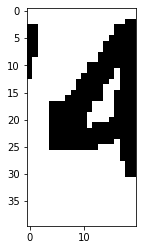

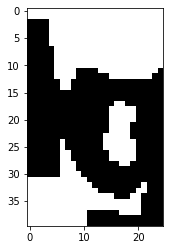

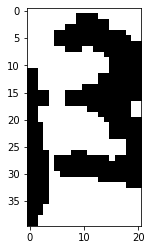

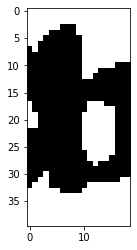

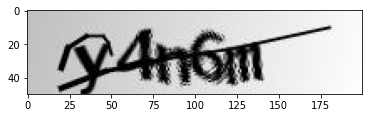

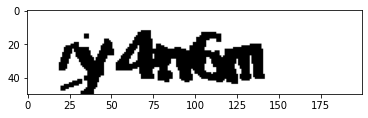

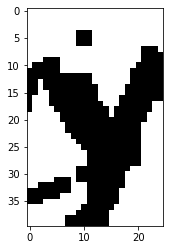

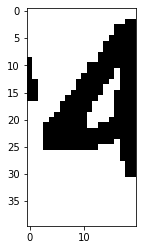

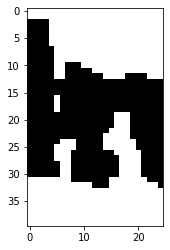

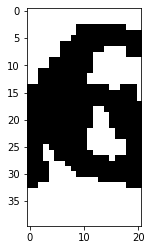

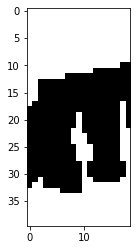

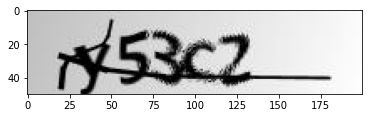

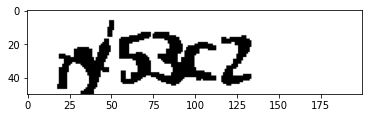

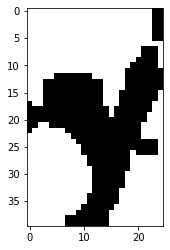

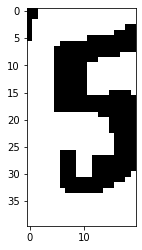

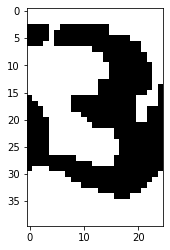

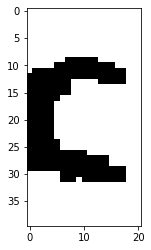

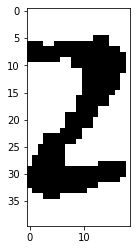

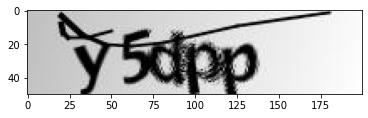

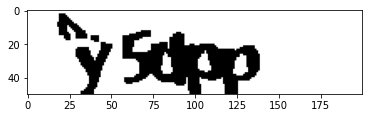

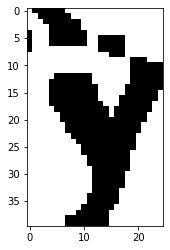

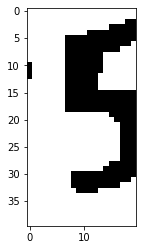

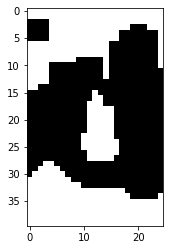

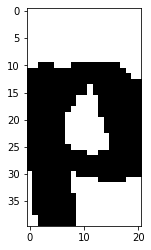

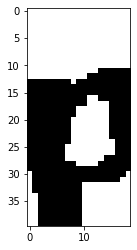

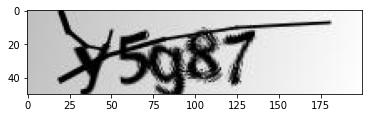

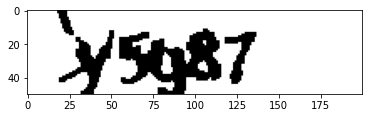

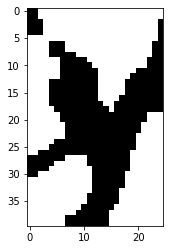

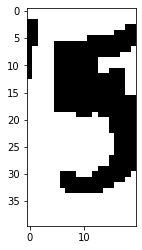

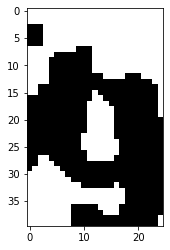

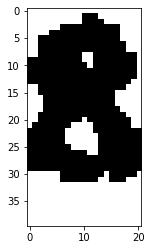

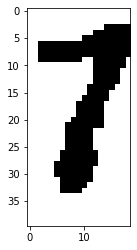

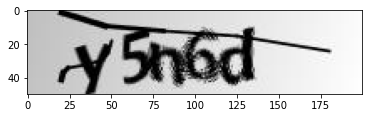

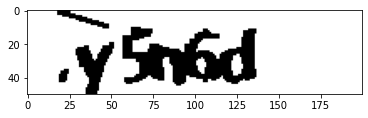

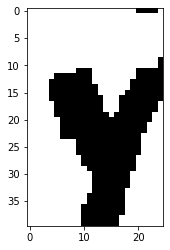

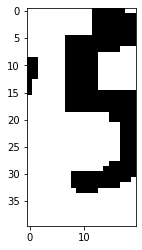

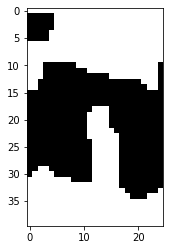

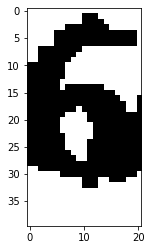

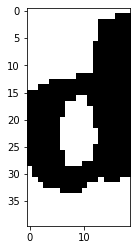

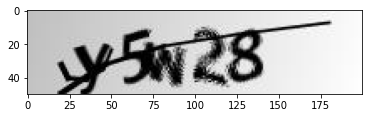

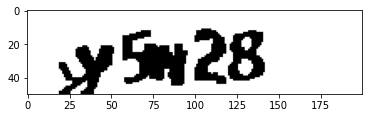

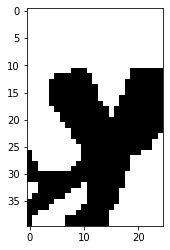

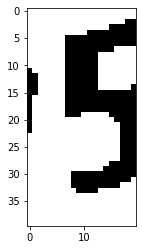

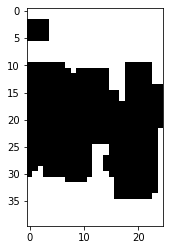

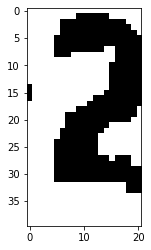

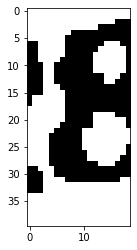

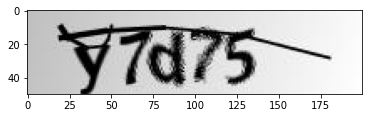

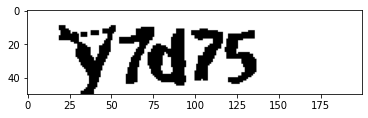

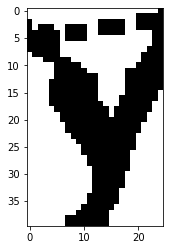

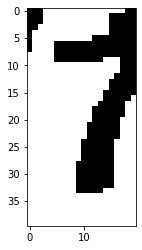

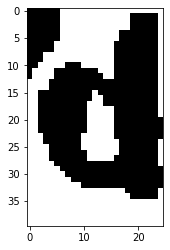

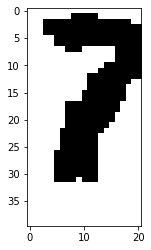

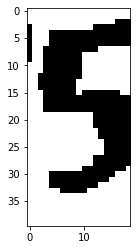

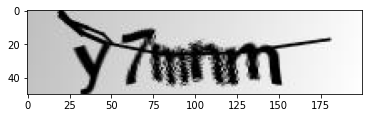

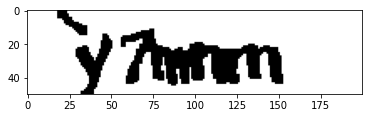

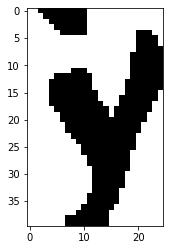

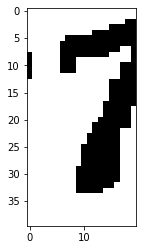

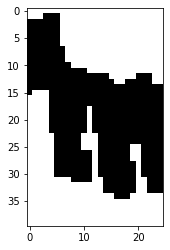

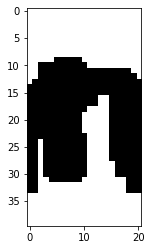

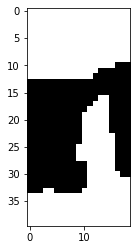

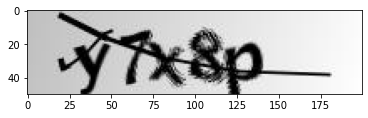

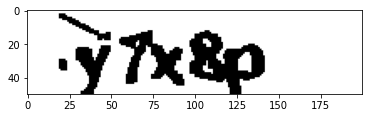

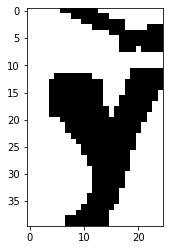

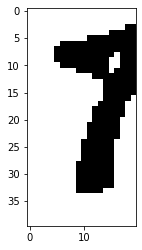

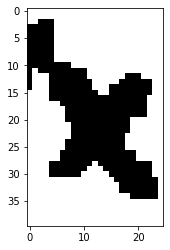

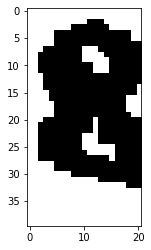

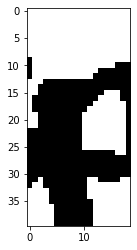

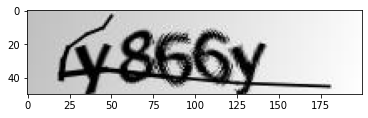

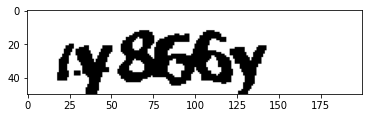

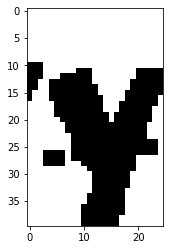

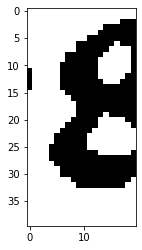

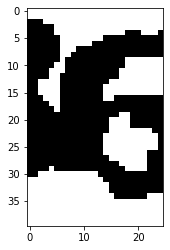

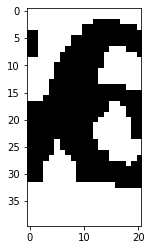

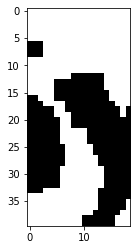

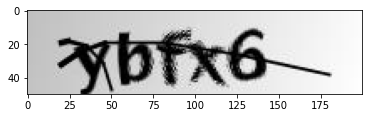

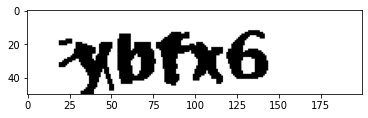

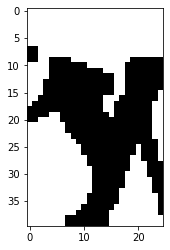

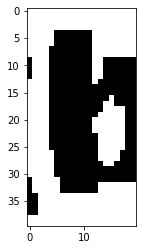

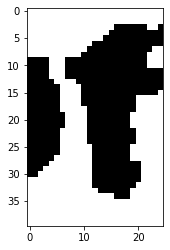

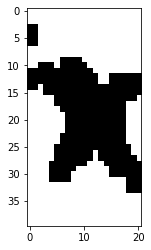

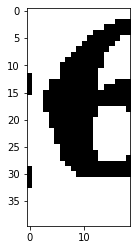

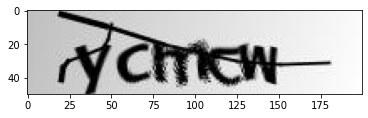

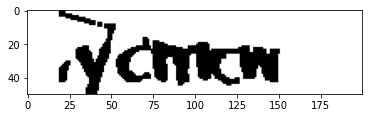

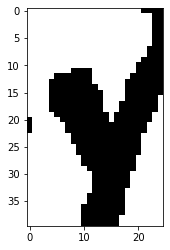

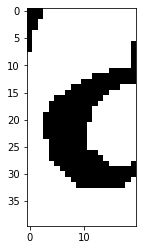

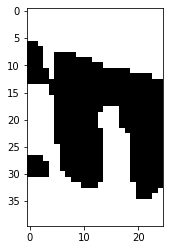

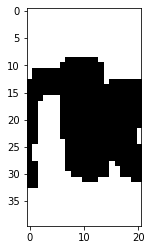

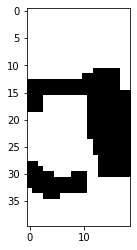

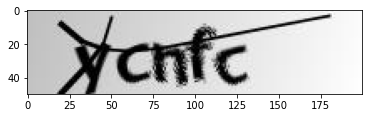

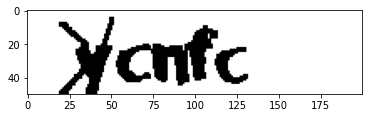

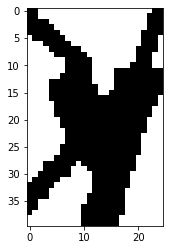

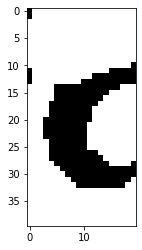

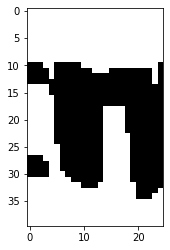

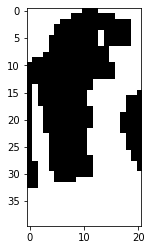

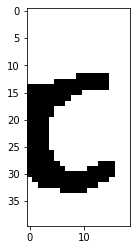

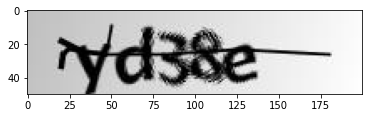

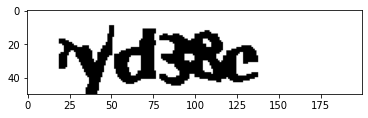

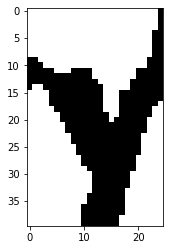

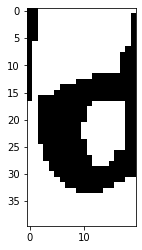

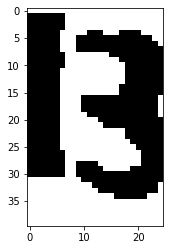

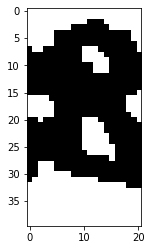

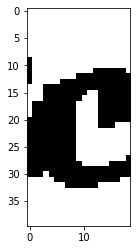

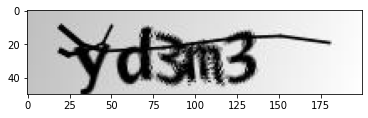

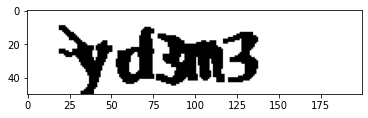

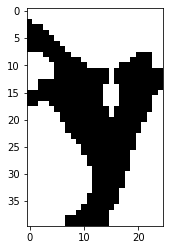

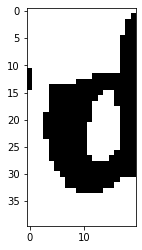

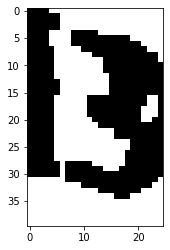

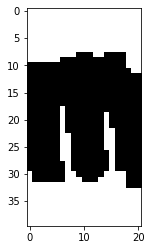

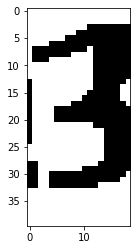

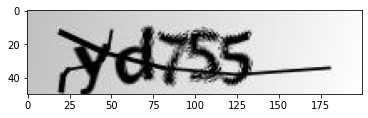

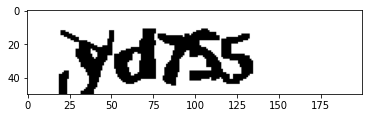

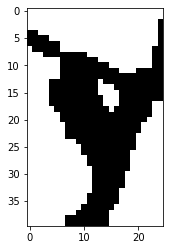

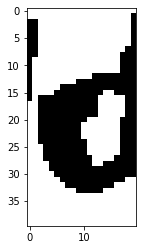

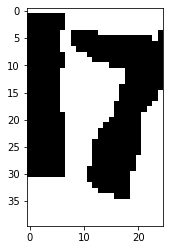

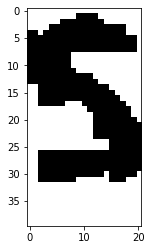

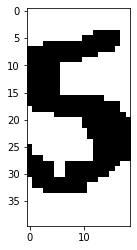

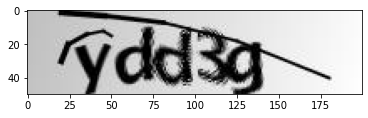

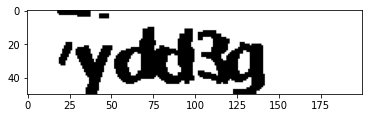

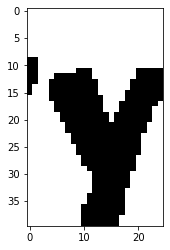

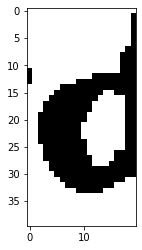

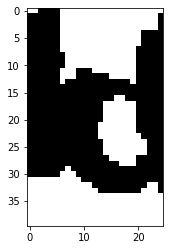

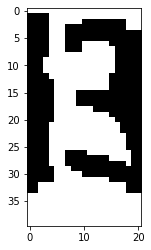

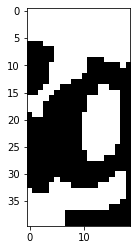

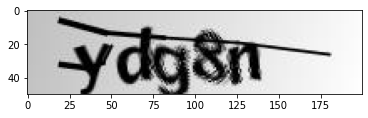

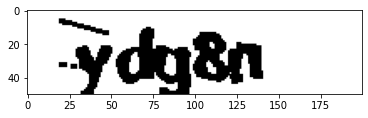

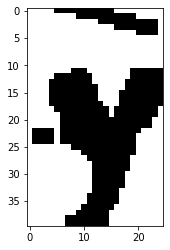

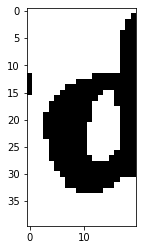

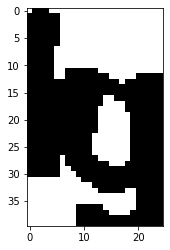

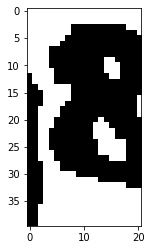

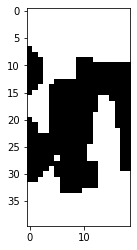

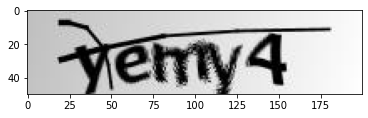

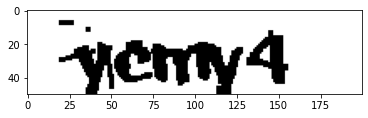

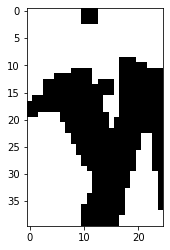

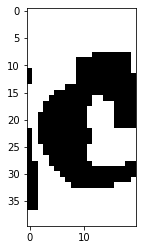

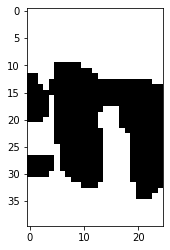

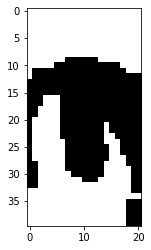

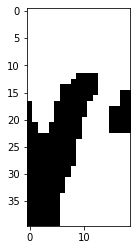

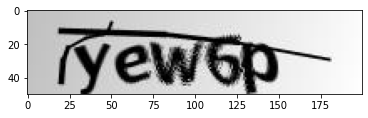

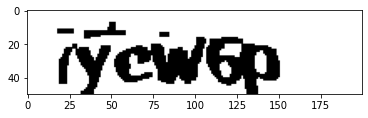

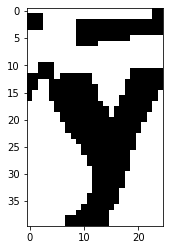

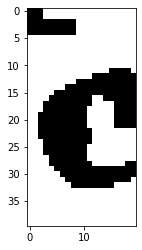

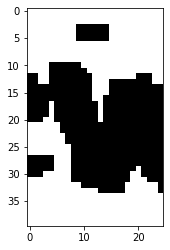

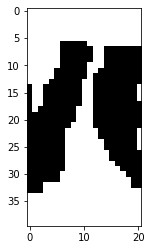

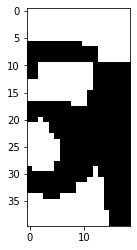

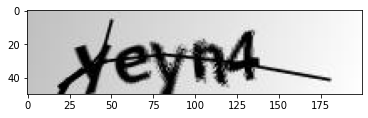

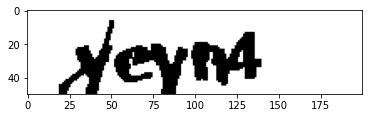

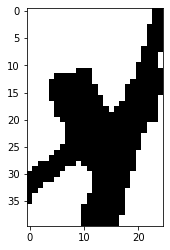

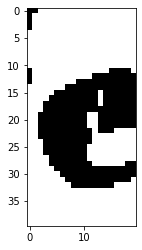

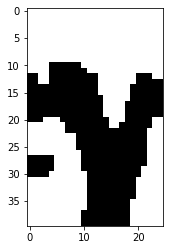

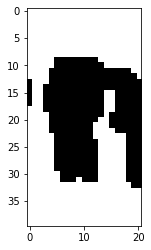

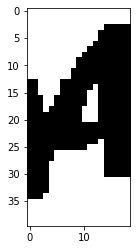

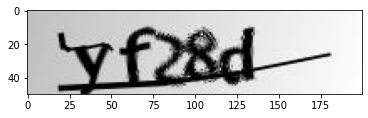

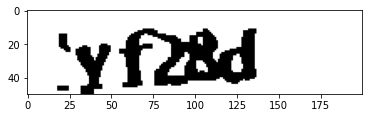

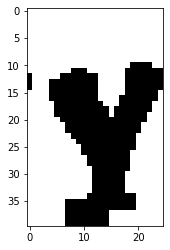

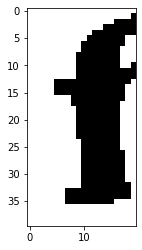

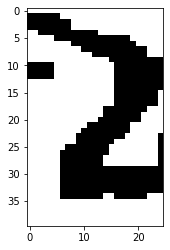

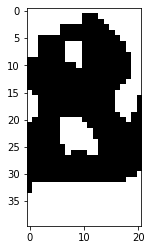

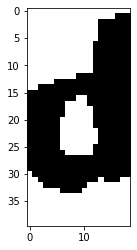

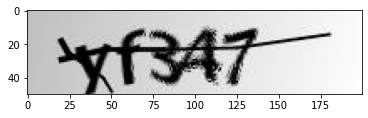

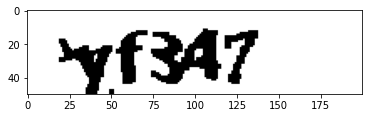

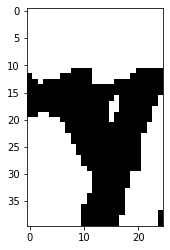

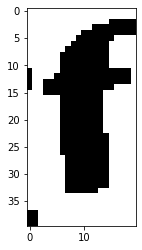

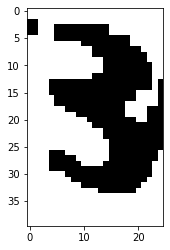

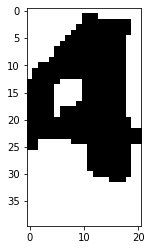

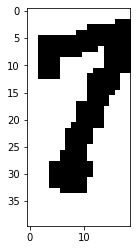

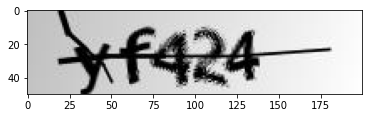

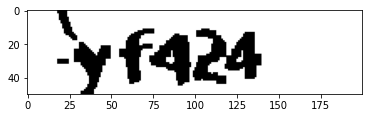

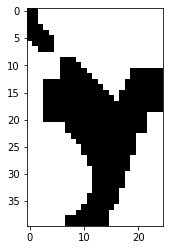

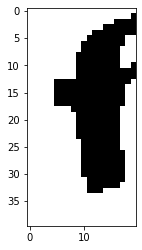

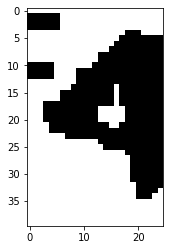

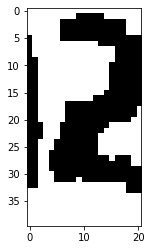

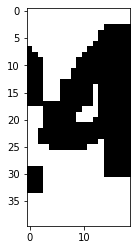

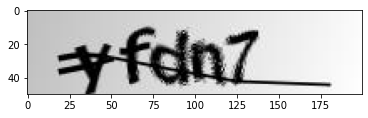

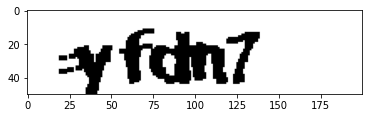

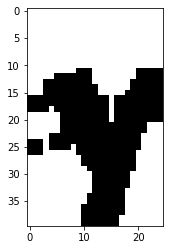

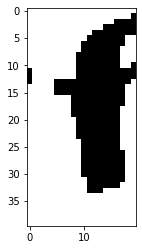

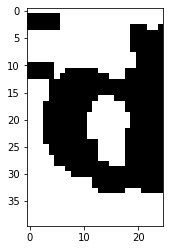

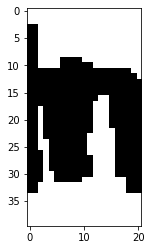

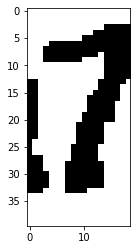

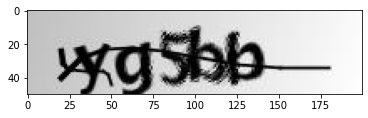

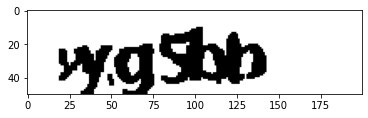

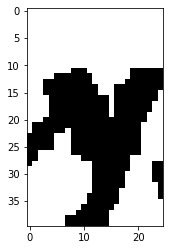

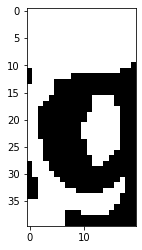

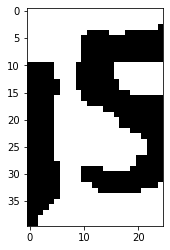

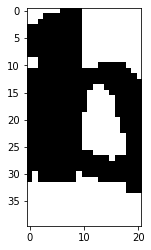

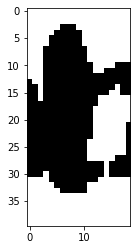

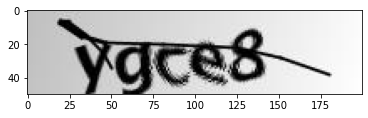

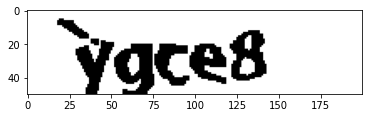

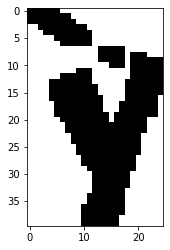

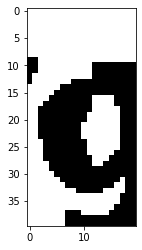

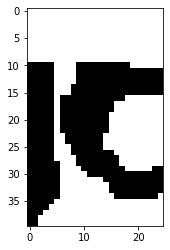

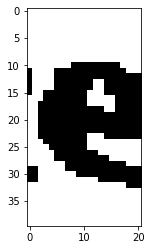

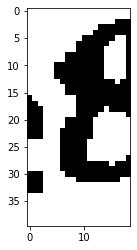

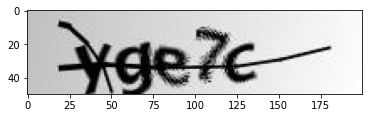

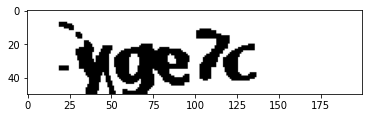

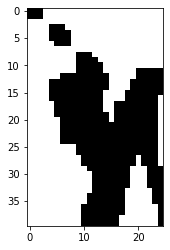

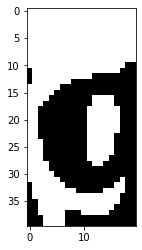

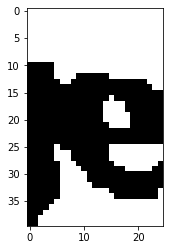

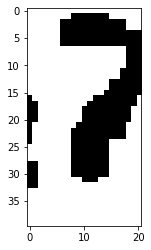

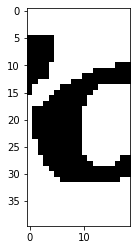

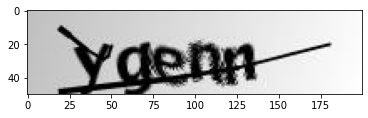

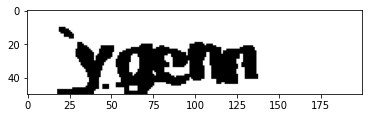

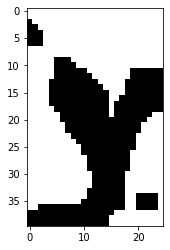

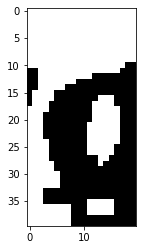

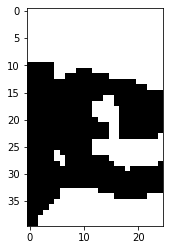

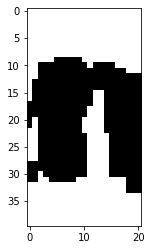

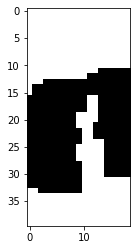

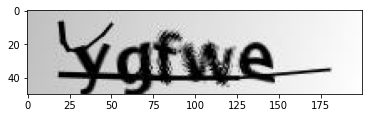

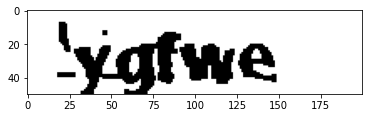

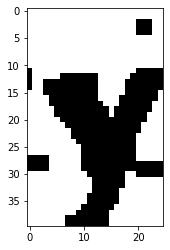

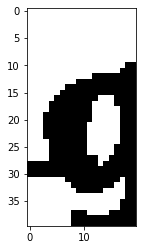

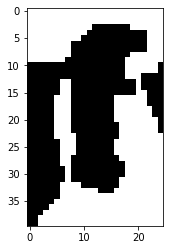

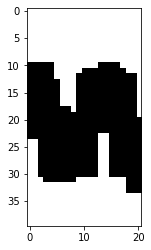

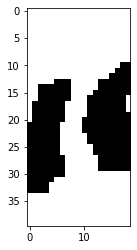

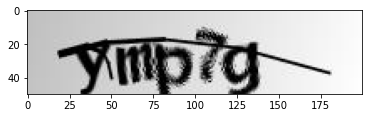

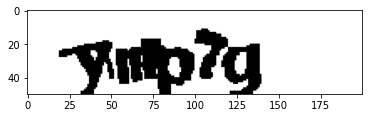

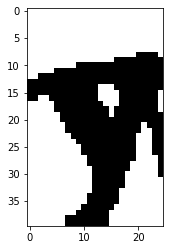

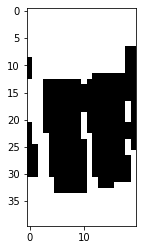

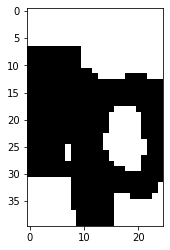

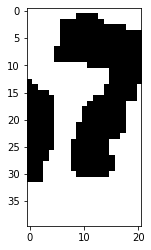

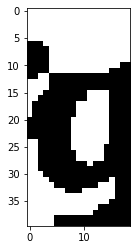

In [78]:
iter = 0
test_dir = "C:/Users/KARTIK BALI/Desktop/Datasets CNN/CAPTCHA/Test samples"
test_path = "C:/Users/KARTIK BALI/Desktop/Datasets CNN/CAPTCHA/Test_Image_Set"#To keep character segmented images in
for i in os.listdir(test_dir):
    iter+=1
    img_path = test_dir+'/'+i 
    img = cv2.imread(img_path)
    b,g,r = cv2.split(img)
    img1 = cv2.merge((r,g,b))
    kernel_dil = np.ones((5,2),'uint8')
    kernel_ero = np.ones((3,3),'uint8')
    thresh = 190#creasing threshold will increase the black since we're making the white criteria stricter 
    img2 = cv2.dilate(img,kernel_dil)
    img2 = cv2.erode(img2,kernel_ero)
    #img2 = cv2.dilate(img2,kernel_ero)
    kernel2 = np.ones((2,2),'uint8')
    img2 = cv2.threshold(img2,thresh,255,cv2.THRESH_BINARY)[1]
    #img2 = cv2.erode(img2,kernel2)
    #img2[Height,width]
    I1_image = i[:-4]+"(1)"+".png"
    I2_image = i[:-4]+"(2)"+".png"
    I3_image = i[:-4]+"(3)"+".png"
    I4_image = i[:-4]+"(4)"+".png"
    I5_image = i[:-4]+"(5)"+".png"
    
    I1 = img2[10:50,25:50]
    I2 = img2[10:50,50:70]
    I3 = img2[10:50,70:95]
    I4 = img2[10:50,95:116]
    I5 = img2[10:50,116:135]
    
    cv2.imwrite(os.path.join(test_path,I1_image),I1)
    cv2.imwrite(os.path.join(test_path,I2_image),I2)
    cv2.imwrite(os.path.join(test_path,I3_image),I3)
    cv2.imwrite(os.path.join(test_path,I4_image),I4)
    cv2.imwrite(os.path.join(test_path,I5_image),I5)

    #img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    #img2 = cv2.merge((b1,b1,b1))    
    if(iter<40 and iter>0):
        plt.figure()
        plt.imshow(img1)
        plt.figure()
        plt.imshow(img2)
        plt.figure()
        plt.imshow(I1)
        plt.figure()
        plt.imshow(I2)
        plt.figure()
        plt.imshow(I3)
        plt.figure()
        plt.imshow(I4)
        plt.figure()
        plt.imshow(I5)

In [79]:
Y_test = os.listdir(test_path)
Y_test = pd.DataFrame(Y_test,columns=['image_id'])
print(os.listdir(test_dir))
post = ImageDataGenerator()
test_gen = post.flow_from_dataframe(
    dataframe = Y_test,
    directory = test_path,
    shuffle = False,
    class_mode = None,
    color_mode = 'grayscale',
    x_col = 'image_id',
    y_col = None,
    seed = 42,
    batch_size = 1,
    target_size = (25,40)
    )
y_pred = model.predict(test_gen)
y_test = []
index = 0
print(len(y_pred))
print(len(y_pred[0]))
for i in range(len(y_pred)):
    max_ = 0
    for j in range(len(y_pred[0])):
        if(y_pred[i][j]>max_):
            max_ = y_pred[i][j]
            index = j
    y_test.append(y_val_categories[index])
print(y_test)
answers = []
i=0
while(i<len(y_pred)):
    string = y_test[i]+y_test[i+1]+y_test[i+2]+y_test[i+3]+y_test[i+4]
    answers.append(string)
    i+=5
print(answers)
Test_Image_Answers = {'Image_ID':os.listdir(test_dir),'CAPTCHA OCR':answers}
Test_Image_Answers = pd.DataFrame(Test_Image_Answers)
print(Test_Image_Answers)
accuracy=0;
for i in range(len(Test_Image_Answers)):
    if(Test_Image_Answers.loc[i,'Image_ID'][:-4]==Test_Image_Answers.loc[i,'CAPTCHA OCR']):
        accuracy+=1
print('Accuracy: {} %'.format(accuracy*100/48))

['y2436.png', 'y2ye8.png', 'y32yy.png', 'y33nm.png', 'y3c58.png', 'y48c3.png', 'y4ec2.png', 'y4g3b.png', 'y4n6m.png', 'y53c2.png', 'y5dpp.png', 'y5g87.png', 'y5n6d.png', 'y5w28.png', 'y7d75.png', 'y7mnm.png', 'y7x8p.png', 'y866y.png', 'ybfx6.png', 'ycmcw.png', 'ycnfc.png', 'yd38e.png', 'yd3m3.png', 'yd755.png', 'ydd3g.png', 'ydg8n.png', 'yemy4.png', 'yew6p.png', 'yeyn4.png', 'yf28d.png', 'yf347.png', 'yf424.png', 'yfdn7.png', 'yg5bb.png', 'ygce8.jpg', 'yge7c.jpg', 'ygenn.png', 'ygfwe.png', 'ymp7g.png', 'ypp8f.png', 'ypw3d.png', 'yw667.png', 'yw7ny.png', 'yw8y5.jpg', 'ywn6f.png', 'yx2d4.png', 'yxd7m.png', 'yy824.png']
Found 240 validated image filenames.
240
19
['y', '2', '4', '3', '6', 'y', '2', 'y', 'e', '8', 'y', '3', '2', 'y', 'y', 'y', '3', '3', 'n', 'm', 'y', '3', 'c', '5', '8', 'y', '4', '8', 'c', '3', 'y', '4', 'e', 'c', '2', 'y', '4', 'g', '3', 'b', 'y', '4', 'n', '6', 'm', 'y', '5', '3', 'c', '2', 'y', '5', 'd', 'p', 'p', 'y', '5', 'g', '8', '7', 'y', '5', 'n', '6', 'd', 'y', 